In [1]:
# Simple logistic regression model to solve OCR task 
# with MNIST in TensorFlow
# MNIST dataset: yann.lecun.com/exdb/mnist/

# Problem Statement
1. Consider the attached file logistic_regression_mnist.py. 
2. Search through TensorFlow API documentation and the Internet and describe for us what is the meaning and purpose of functions used in step 5 and step 6. 
3. Demonstrate that you can run the code successfully. 
4. Fetch for us the TensorBoard Graph. 
5. Vary parameter batch_size through values: 8, 64, 128, 256 and report and plot changes in the execution time and accuracy. 
6. Keep other parameters the same as in the original program. Similarly, vary parameter learning_rate through values 0.001, 0.005, 0.01, 0.02 and 0.05. 
7. Report and plot changes in the execution time and accuracy. 

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Define paramaters for the model
learning_rate = 0.01
# batch_size = [8, 64, 128, 256]
batch_size = 128
n_epochs = 30

In [4]:
# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder mnist
mnist = input_data.read_data_sets('./mnist', one_hot=True) 

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


In [5]:
# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# each lable is one hot vector.
X = tf.placeholder(tf.float32, [batch_size, 784], name='X_placeholder') 
Y = tf.placeholder(tf.float32, [batch_size, 10], name='Y_placeholder')

In [6]:
# Step 3: create weights and bias
# w is initialized to random variables with mean of 0, stddev of 0.01
# b is initialized to 0
# shape of w depends on the dimension of X and Y so that Y = tf.matmul(X, w)
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name="bias")

In [7]:
# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
logits = tf.matmul(X, w) + b

In [8]:
# Step 5: define loss function
# use cross entropy of softmax of logits as the loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=Y, name='loss')
loss = tf.reduce_mean(entropy) # computes the mean over all the examples in the batch

In [9]:
# Step 6: define training op
# using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [10]:
with tf.Session() as sess:
	# to visualize using TensorBoard
	writer = tf.summary.FileWriter('./logistic_reg', sess.graph)

	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print ('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print ('Total time: {0} seconds'.format(time.time() - start_time))

	print('Optimization Finished!') # should be around 0.35 after 25 epochs

	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32))
		total_correct_preds += sess.run(accuracy)	
	
	print ('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

	writer.close()


Average loss epoch 0: 1.28869297593
Average loss epoch 1: 0.732997492477
Average loss epoch 2: 0.600584483091
Average loss epoch 3: 0.53683312074
Average loss epoch 4: 0.497764433042
Average loss epoch 5: 0.472195458162
Average loss epoch 6: 0.45011702555
Average loss epoch 7: 0.436941364151
Average loss epoch 8: 0.422752981211
Average loss epoch 9: 0.414043052908
Average loss epoch 10: 0.403970642002
Average loss epoch 11: 0.398303052415
Average loss epoch 12: 0.389086166253
Average loss epoch 13: 0.384626022516
Average loss epoch 14: 0.378921993129
Average loss epoch 15: 0.375756940815
Average loss epoch 16: 0.369875183403
Average loss epoch 17: 0.366797885486
Average loss epoch 18: 0.3625113582
Average loss epoch 19: 0.359498616525
Average loss epoch 20: 0.357478011182
Average loss epoch 21: 0.35475778215
Average loss epoch 22: 0.350648510289
Average loss epoch 23: 0.348126383928
Average loss epoch 24: 0.346712391138
Average loss epoch 25: 0.344206429028
Average loss epoch 26: 0.341

In [11]:
# Vary parameter batch_size through values: 8, 64, 128, 256 and report and plot changes in the execution time and accuracy.
# Keep other parameters the same as in the original program. Similarly, vary parameter learning_rate through values 0.001, 0.005, 0.01, 0.02 and 0.05.
# Report and plot changes in the execution time and accuracy.

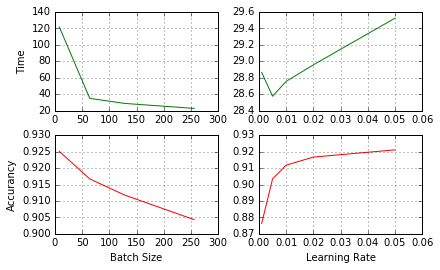

In [16]:
# input test results
batch_size = [8, 64, 128, 256]
time_1 = [121.864, 34.887, 28.756, 22.691]
accuracy_1 = [0.9251, 0.9167, 0.9118, 0.9043]

learning_rate = [0.001, 0.005, 0.01, 0.02, 0.05]
time_2 = [28.8654, 28.575, 28.756, 28.957, 29.525]
accuracy_2 = [0.8763, 0.9034, 0.9118, 0.9167, 0.9211]

# plot with various axes scales
plt.figure(1)

# test1
plt.subplot(221)
plt.plot(batch_size, time_1, "g")
plt.ylabel('Time')
plt.grid(True)

# test2
plt.subplot(222)
plt.plot(learning_rate, time_2, "g")
plt.grid(True)

# test3
plt.subplot(223)
plt.plot(batch_size, accuracy_1, "r")
plt.ylabel('Accurancy')
plt.xlabel('Batch Size')
plt.grid(True)

# test4
plt.subplot(224)
plt.plot(learning_rate, accuracy_2, "r")
plt.xlabel('Learning Rate')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.15, left=0.1, right=0.95, hspace=0.25,
                    wspace=0.25)

plt.show()